In [184]:
import numpy as np
from scipy import stats, ndimage
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import PowerNorm
from matplotlib import rcParams
from math import floor

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [185]:
xsize, ysize = 40, 40
max_iterations = 100
gamma = 1/6

In [186]:
beta_matrix = stats.norm(1.3, 0.05).rvs(size=xsize * ysize).reshape(xsize, ysize)

In [187]:
I_0_matrix = stats.norm(1e-2, 1e-3).rvs(size=xsize * ysize).reshape(xsize, ysize)
spot = (floor(xsize/3), floor(ysize/3))
width = floor(xsize/10)

I_0_matrix[spot[0]-width:spot[0]+width, spot[1]-width:spot[1]+width] = stats.norm(5e-2, 1e-3).rvs(size=(2 * width)**2).reshape(2*width, 2*width)
S_0_matrix = np.ones(shape=(xsize, ysize)) - I_0_matrix

In [188]:
population_matrix = stats.norm(1e3, 3e2).rvs(size=xsize * ysize).reshape(xsize, ysize)

N = np.sum(population_matrix)

In [189]:
S_0_matrix *= population_matrix
I_0_matrix *= population_matrix

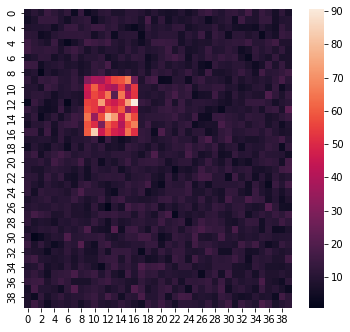

In [190]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5.5))
sns.heatmap(I_0_matrix )

In [191]:
I_arr, S_arr, R_arr = [I_0_matrix], [S_0_matrix], [np.zeros_like(S_0_matrix)]

In [192]:
for i in range(max_iterations):
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

    I_min_neighbourhood = ndimage.generic_filter(I_arr[-1], np.min, footprint=kernel)

    S_arr.append(S_arr[-1] - beta_matrix * S_arr[-1]/population_matrix * I_min_neighbourhood)
    I_arr.append(I_arr[-1] + beta_matrix * S_arr[-1]/population_matrix * I_min_neighbourhood - gamma * I_arr[-1])
    R_arr.append(R_arr[-1] + gamma * I_arr[-1])

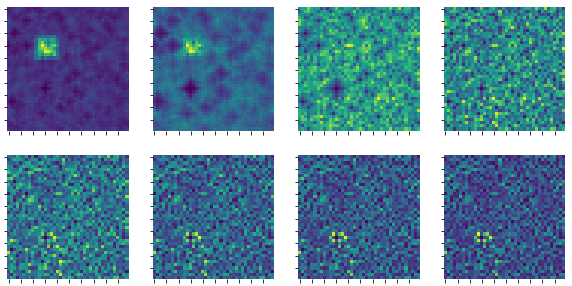

In [193]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5), gridspec_kw={"width_ratios": [1,1,1,1]})


sns.heatmap(I_arr[2], ax=axes[0,0], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[5], ax=axes[0,1], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[8], ax=axes[0,2], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[11], ax=axes[0,3],  cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[14], ax=axes[1,0], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[17], ax=axes[1,1], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[20], ax=axes[1,2], cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[23], ax=axes[1,3],  cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))

for a in axes.flatten():
    a.set(xticklabels=[], yticklabels=[])

plt.savefig("filtering_ripple.pdf")

In [194]:
I_fractions = np.dstack(I_arr)
S_fractions = np.dstack(S_arr)

<ipython-input-195-a4782ee04be0>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


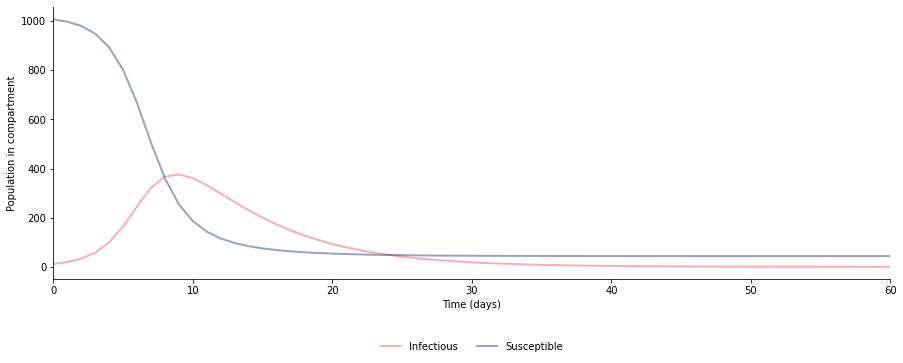

In [195]:
fig = plt.figure(facecolor="w", figsize=(15, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(I_fractions.shape[2]), [I_fractions[:, :, i].mean() for i in range(I_fractions.shape[2])], color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
ax.plot(range(S_fractions.shape[2]), [S_fractions[:, :, i].mean() for i in range(S_fractions.shape[2])], color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Population in compartment")
ax.set_xlim(0, 60)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

#ax.set_yscale("log")

fig.subplots_adjust(bottom=0.25)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("sir_from_interaction_lattice.pdf")
plt.show()

<ipython-input-196-76efcfc3f19b>:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


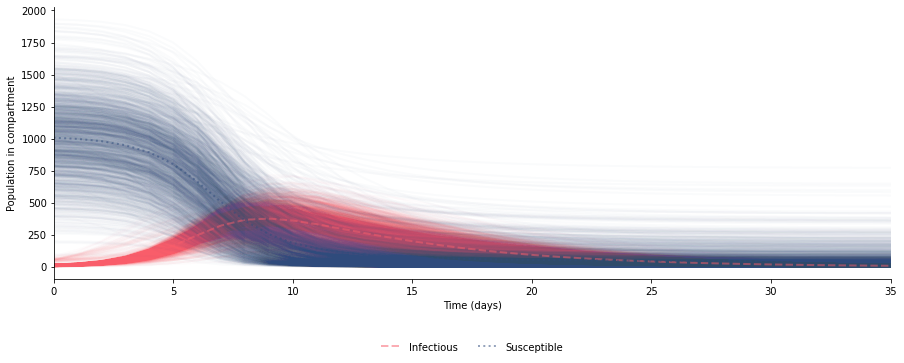

In [196]:
fig = plt.figure(facecolor="w", figsize=(15, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(I_fractions.reshape(xsize * ysize, 101).T, color=COLORS["I"], alpha=0.02, lw=2, label=None)
ax.plot(S_fractions.reshape(xsize * ysize, 101).T, color=COLORS["S"], alpha=0.02, lw=2, label=None)

ax.plot(range(I_fractions.shape[2]), [I_fractions[:, :, i].mean() for i in range(I_fractions.shape[2])], color=COLORS["I"], linestyle="dashed", alpha=0.5, lw=2, label="Infectious")
ax.plot(range(S_fractions.shape[2]), [S_fractions[:, :, i].mean() for i in range(S_fractions.shape[2])], color=COLORS["S"], linestyle="dotted", alpha=0.5, lw=2, label="Susceptible")


ax.set_xlabel('Time (days)')
ax.set_ylabel("Population in compartment")
ax.set_xlim(0, 35)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend(["Infectious", "Susceptible"])
legend.get_frame().set_alpha(0.5)

fig.subplots_adjust(bottom=0.25)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("sir_from_interacting_lattice.pdf")
plt.show()